In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

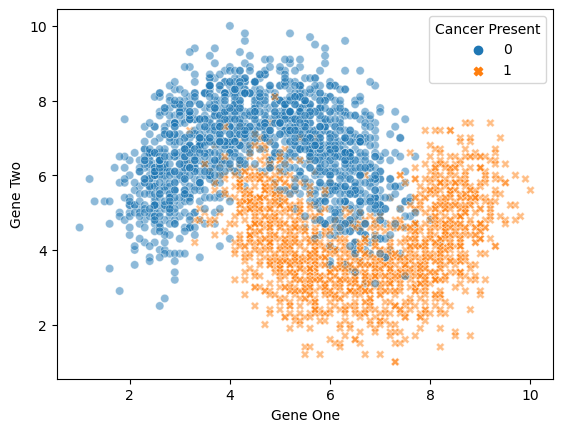

In [9]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5,style='Cancer Present')

In [6]:
df.corr()

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


In [7]:
len(df)

3000

C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

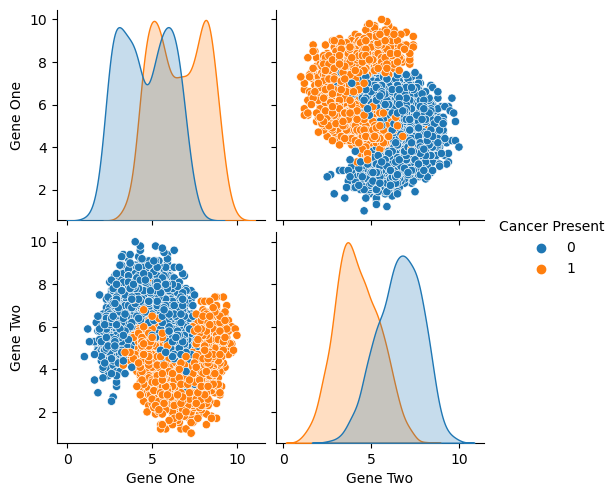

In [10]:
sns.pairplot(data=df,hue='Cancer Present')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
X=df.drop('Cancer Present', axis=1)
y=df['Cancer Present']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler=StandardScaler()

In [18]:
scaled_X_train=scaler.fit_transform(X_train)

In [19]:
scaled_X_test=scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#help(KNeighborsClassifier)

In [23]:
knn_model= KNeighborsClassifier(n_neighbors=1)

In [24]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred=knn_model.predict(scaled_X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [27]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [29]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [32]:
lowest_err=1
best_k=0
for K in range(1,30):
    knn_model= KNeighborsClassifier(n_neighbors=K)
    knn_model.fit(scaled_X_train, y_train)
    y_pred=knn_model.predict(scaled_X_test)
    new_err=1-accuracy_score(y_test,y_pred)
    if new_err<lowest_err:
        lowest_err=new_err
        best_k=K
    

In [38]:
test_error_rates=[]
for K in range(1,30):
    knn_model= KNeighborsClassifier(n_neighbors=K)
    knn_model.fit(scaled_X_train, y_train)
    y_pred=knn_model.predict(scaled_X_test)
    test_error=1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

In [33]:
lowest_err

0.05111111111111111

In [34]:
best_k  # dont pick the exact K-value that is lowest, as it increases the complexity of the model, by 10 more K neighbours for just a 1% increase in performance

22

Text(0, 0.5, 'Error Rate')

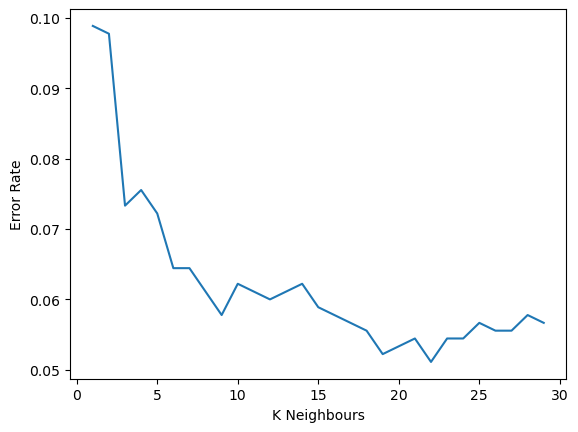

In [45]:
plt.plot(range(1,30), test_error_rates)
plt.xlabel('K Neighbours')
plt.ylabel('Error Rate')

In [47]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [49]:
scaler=StandardScaler()
knn= KNeighborsClassifier()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:*

chosen_string_name + two underscores + parameter key name
model_name + __ + parameter name
knn_model + __ + n_neighbors
knn_model__n_neighbors
StackOverflow on this


The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

In [52]:
operation=[('scaler',scaler),('knn',knn)]
pipe=Pipeline(operation)

In [55]:
k_values= list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [56]:
param_grid={'knn__n_neighbors':k_values}
full_classifier_CV=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [64]:
full_classifier_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [65]:
full_classifier_CV.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [67]:
y_predic=full_classifier_CV.predict(X_test)

In [69]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

